In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
# to check full output.
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000

In [3]:
# read csv files
df = pd.read_csv("Leads.csv")

In [4]:
# print the data
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Checking Structure of the Data 

In [5]:
# checking the rows and columns count.
df.shape

(9240, 37)

In [6]:
# describe. 
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Check the datatype for each columns.
df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [9]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Receive More Updates About Our Courses', 'Get updates on DM Content']

# Defining the map function
def binary(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary)

#### For categorical variables with multiple levels


In [11]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source','Last Activity','Lead Profile']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [12]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,0,Interested in other courses,Low in Relevance,No,0,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,0,Ringing,NaN,No,0,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,0,Will revert after reading the email,Might be,No,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,0,Ringing,Not Sure,No,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,0,Will revert after reading the email,Might be,No,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [13]:
# Creating dummy variables for the variable 'Search'
ml = pd.get_dummies(df['Search'], prefix='Search')
#Adding the results to the master dataframe
df = pd.concat([df,ml], axis=1)

me = pd.get_dummies(df['Magazine'], prefix='Magazine')
#Adding the results to the master dataframe
df = pd.concat([df,me], axis=1)

na = pd.get_dummies(df['Newspaper Article'], prefix='Newspaper Article')
#Adding the results to the master dataframe
df = pd.concat([df,na], axis=1)

ef = pd.get_dummies(df['X Education Forums'], prefix='X Education Forums')
#Adding the results to the master dataframe
df = pd.concat([df,ef], axis=1)

da = pd.get_dummies(df['Digital Advertisement'], prefix='Digital Advertisement')
#Adding the results to the master dataframe
df = pd.concat([df,da], axis=1)

tr = pd.get_dummies(df['Through Recommendations'], prefix='Through Recommendations')
#Adding the results to the master dataframe
df = pd.concat([df,tr], axis=1)

tr = pd.get_dummies(df['Through Recommendations'], prefix='Through Recommendations')
#Adding the results to the master dataframe
df = pd.concat([df,tr], axis=1)


In [14]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,Search_No,Search_Yes,Magazine_No,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Through Recommendations_No,Through Recommendations_Yes,Through Recommendations_No,Through Recommendations_Yes
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,0,Interested in other courses,Low in Relevance,No,0,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,0,Ringing,NaN,No,0,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,0,Will revert after reading the email,Might be,No,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,0,Ringing,Not Sure,No,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428

In [15]:
# We have created dummies for the below variables, so we can drop them
df = df.drop(['Lead Origin','Lead Source','Last Activity','Search', 'Magazine', 'X Education Forums', 'Digital Advertisement',
             'Newspaper Article','Newspaper','Through Recommendations','Lead Profile'], 1)

In [16]:
df.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,Search_No,Search_Yes,Magazine_No,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Through Recommendations_No,Through Recommendations_Yes,Through Recommendations_No,Through Recommendations_Yes
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,NaN,Select,Select,Unemployed,Better Career Prospects,0,Interested in other courses,Low in Relevance,No,0,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,India,Select,Select,Unemployed,Better Career Prospects,0,Ringing,NaN,No,0,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,India,Business Administration,Select,Student,Better Career Prospects,0,Will revert after reading the email,Might be,No,0,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,Ringing,Not Sure,No,0,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,India,Select,Other,Unemployed,Better Career Prospects,0,Will revert after reading the email,Might be,No,0,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0


In [17]:
# Dropping unwanted columns as this are not required for the analysis.

df = df.drop(['A free copy of Mastering The Interview','I agree to pay the amount through cheque','Update me on Supply Chain Content'],1)

In [18]:
df.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Receive More Updates About Our Courses,Tags,Lead Quality,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,Search_No,Search_Yes,Magazine_No,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Through Recommendations_No,Through Recommendations_Yes,Through Recommendations_No,Through Recommendations_Yes
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,NaN,Select,Select,Unemployed,Better Career Prospects,0,Interested in other courses,Low in Relevance,0,Select,02.Medium,02.Medium,15.0,15.0,Modified,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,India,Select,Select,Unemployed,Better Career Prospects,0,Ringing,NaN,0,Select,02.Medium,02.Medium,15.0,15.0,Email Opened,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,India,Business Administration,Select,Student,Better Career Prospects,0,Will revert after reading the email,Might be,0,Mumbai,02.Medium,01.High,14.0,20.0,Email Opened,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,Ringing,Not Sure,0,Mumbai,02.Medium,01.High,13.0,17.0,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,India,Select,Other,Unemployed,Better Career Prospects,0,Will revert after reading the email,Might be,0,Mumbai,02.Medium,01.High,15.0,18.0,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0


#### Checking for Missing Values and Inputing Them


In [19]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Receive More Updates About Our Courses              0
Tags                                             3353
Lead Quality                                     4767
Get updates on DM Content                           0
City                                             1420
Asymmetrique Activity Index 

In [20]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Receive More Updates About Our Courses            0.00
Tags                                             36.29
Lead Quality                                     51.59
Get updates on DM Content                         0.00
City                                             15.37
Asymmetriq

In [21]:
# Removing the columns with high percentage (>40%)
df.columns[round((df.isnull().sum()/9240)*100,2)>40]

Index(['Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [22]:
df.drop(df.columns[round((df.isnull().sum()/9240)*100,2)>40],axis=1,inplace=True)

In [23]:
df.TotalVisits.describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [24]:
df['TotalVisits'].describe(percentiles=[.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

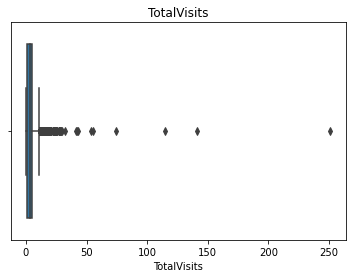

In [25]:
plt.title("TotalVisits")
sns.boxplot(df.TotalVisits)
plt.show()

In [26]:
#Observations:
# 1. Some outliers are present in the data after 20

In [27]:
df = df[df['TotalVisits']<20]

In [28]:
df.Country.value_counts()

India                   6435
United States             68
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
Germany                    4
unknown                    4
South Africa               4
Nigeria                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [29]:
# Observations
# 1. Most of the site visits are from 'India' and we can fill the data with 'India' value.

In [30]:
df.Country.fillna("India",inplace=True)

In [31]:
df.Specialization.value_counts()

Select                               1868
Finance Management                    957
Human Resource Management             831
Marketing Management                  820
Operations Management                 499
Business Administration               394
IT Projects Management                363
Supply Chain Management               343
Banking, Investment And Insurance     331
Travel and Tourism                    200
Media and Advertising                 199
International Business                174
Healthcare Management                 153
E-COMMERCE                            111
Hospitality Management                110
Retail Management                      97
Rural and Agribusiness                 71
E-Business                             56
Services Excellence                    40
Name: Specialization, dtype: int64

In [32]:
df.Specialization.fillna("Other",inplace=True)

In [33]:
df.Tags.value_counts()

Will revert after reading the email                  2023
Ringing                                              1177
Interested in other courses                           506
Already a student                                     465
Closed by Horizzon                                    295
switched off                                          239
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           138
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    26
in touch with EINS                                     12
Lost to Others

In [34]:
df.Tags.fillna(df.Tags.mode() [0],inplace=True)

In [35]:
df['How did you hear about X Education'].value_counts()

Select                   4883
Online Search             797
Word Of Mouth             347
Student of SomeSchool     310
Other                     183
Multiple Sources          152
Advertisements             68
Social Media               65
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [36]:
# Observations:
# 1. We can fill the values with 'Select' value

In [37]:
df['How did you hear about X Education'].fillna(df['How did you hear about X Education'].mode() [0],inplace=True)

In [38]:
df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6353
Flexibility & Convenience       1
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [39]:
# Observations:
# 1. We can fill the null values with the 'Better career prospects' value.

In [40]:
df['What matters most to you in choosing a course'].fillna(df['What matters most to you in choosing a course'].mode()[0],inplace=True)

In [41]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Country                                          25.70
Specialization                                   15.78
How did you hear about X Education               24.21
What is your current occupation                  29.53
What matters most to you in choosing a course    29.73
Receive More Updates About Our Courses            0.00
Tags                                             36.67
Get updates on DM Content                         0.00
City                                             15.65
Last Notable Activity                             0.00
Lead Origi

In [42]:
df.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Receive More Updates About Our Courses,Tags,Get updates on DM Content,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,Search_No,Search_Yes,Magazine_No,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Through Recommendations_No,Through Recommendations_Yes,Through Recommendations_No,Through Recommendations_Yes
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,NaN,Select,Select,Unemployed,Better Career Prospects,0,Interested in other courses,0,Select,Modified,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,India,Select,Select,Unemployed,Better Career Prospects,0,Ringing,0,Select,Email Opened,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,India,Business Administration,Select,Student,Better Career Prospects,0,Will revert after reading the email,0,Mumbai,Email Opened,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,Ringing,0,Mumbai,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,India,Select,Other,Unemployed,Better Career Prospects,0,Will revert after reading the email,0,Mumbai,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0


### Imbalance percentage 


In [44]:
df.Converted.value_counts(normalize=True)

0    0.619969
1    0.380031
Name: Converted, dtype: float64

In [45]:
# Observation: Converted-0 has more data than Converted-1
# Converted-0 has 61.9% data and Converted-1 has 38% data

In [46]:
# Dividing the data into two datasets based on Converted Values.
df_Converted_0 = df[df.Converted==0]
df_Converted_1 = df[df.Converted==1]

In [47]:
df_Converted_0.head(3)

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Receive More Updates About Our Courses,Tags,Get updates on DM Content,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,Search_No,Search_Yes,Magazine_No,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Through Recommendations_No,Through Recommendations_Yes,Through Recommendations_No,Through Recommendations_Yes
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,NaN,Select,Select,Unemployed,Better Career Prospects,0,Interested in other courses,0,Select,Modified,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,India,Select,Select,Unemployed,Better Career Prospects,0,Ringing,0,Select,Email Opened,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,Ringing,0,Mumbai,Modified,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0


In [48]:
df_Converted_1.head(3)

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Receive More Updates About Our Courses,Tags,Get updates on DM Content,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Lead Profile_Lateral Student,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Select,Lead Profile_Student of SomeSchool,Search_No,Search_Yes,Magazine_No,Newspaper Article_No,Newspaper Article_Yes,X Education Forums_No,X Education Forums_Yes,Digital Advertisement_No,Digital Advertisement_Yes,Through Recommendations_No,Through Recommendations_Yes,Through Recommendations_No,Through Recommendations_Yes
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,India,Business Administration,Select,Student,Better Career Prospects,0,Will revert after reading the email,0,Mumbai,Email Opened,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,India,Select,Other,Unemployed,Better Career Prospects,0,Will revert after reading the email,0,Mumbai,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,0,0,1,2.0,1640,2.0,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,0,Will revert after reading the email,0,Mumbai,Modified,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0


## Categorical Univariate Analysis for Converted-0 

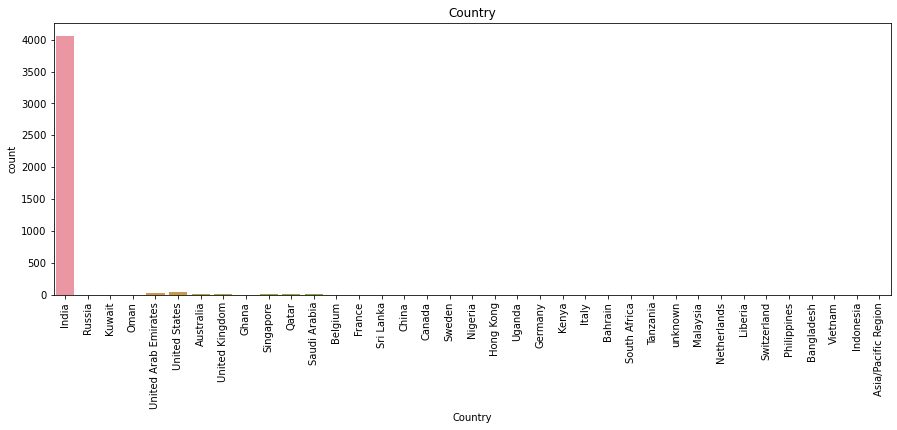

In [51]:
# Country
plt.figure(figsize=[15,5])
plt.title('Country')
sns.countplot(x='Country',data=df_Converted_0)
plt.xticks(rotation=90)
plt.show()

In [52]:
# Observations:
# 1. Most of the site vists are from 'India'.  

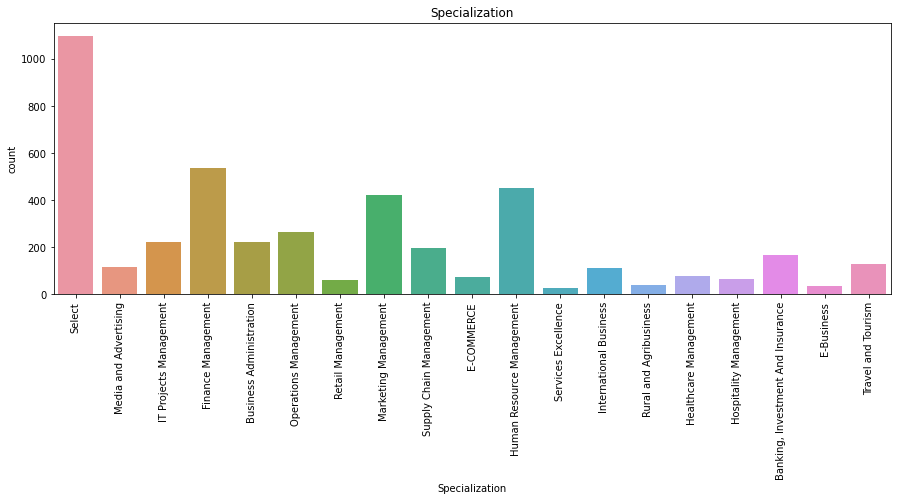

In [53]:
# Specialization
plt.figure(figsize=[15,5])
plt.title('Specialization')
sns.countplot(x='Specialization',data=df_Converted_0)
plt.xticks(rotation=90)
plt.show()

In [54]:
# Observations:
# 1. Most of the Specialization are 'Select' followed by 'Finance Management'.  

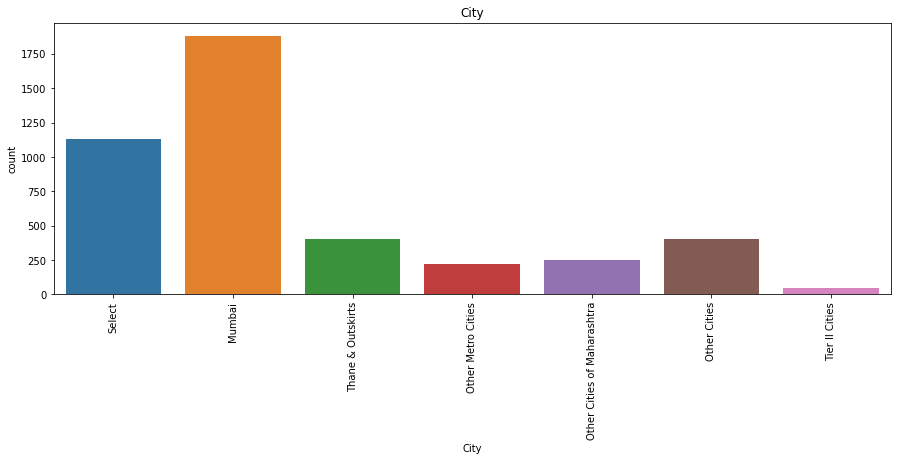

In [55]:
# Specialization
plt.figure(figsize=[15,5])
plt.title('City')
sns.countplot(x='City',data=df_Converted_0)
plt.xticks(rotation=90)
plt.show()

In [56]:
# Observations:
# 1. Most of the site vists are from 'Mumbai'.

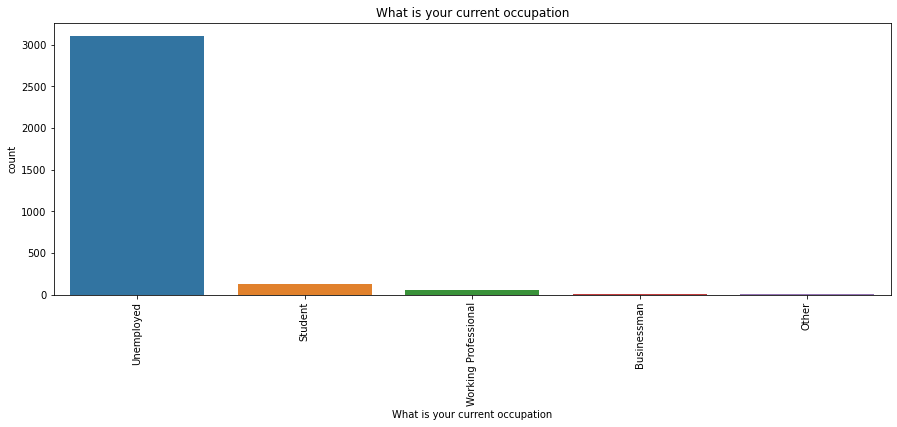

In [58]:
# Specialization
plt.figure(figsize=[15,5])
plt.title('What is your current occupation')
sns.countplot(x='What is your current occupation',data=df_Converted_0)
plt.xticks(rotation=90)
plt.show()

In [59]:
# Observations:
# 1. Most of the site vists are from 'Unemployed'.

## Categorical Univariate Analysis for Converted-1 

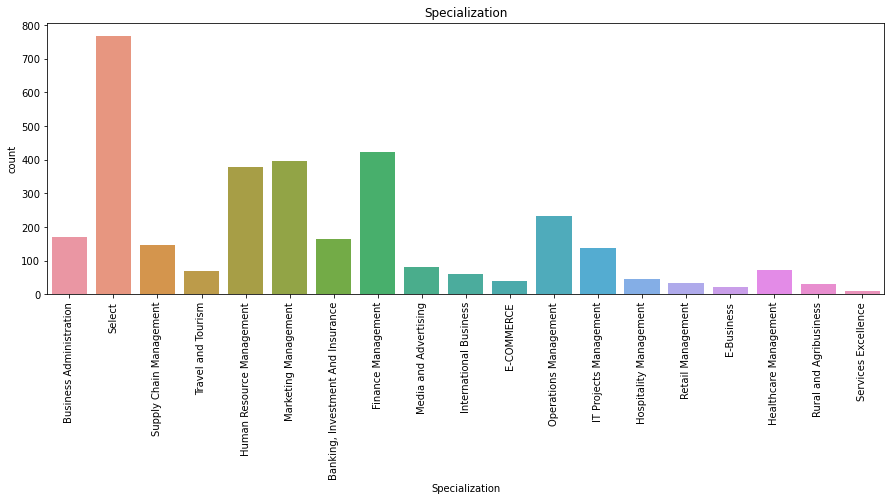

In [60]:
# Country
plt.figure(figsize=[15,5])
plt.title('Specialization')
sns.countplot(x='Specialization',data=df_Converted_1)
plt.xticks(rotation=90)
plt.show()

In [61]:
# Observations:
# 1. Most of the site vists are from 'Select' followed by 'Finance Management' and 'Marketing Management'

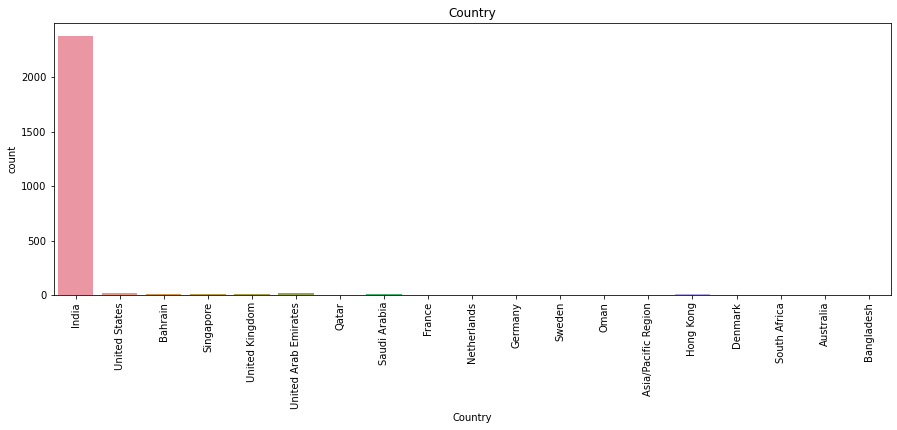

In [62]:
# Country
plt.figure(figsize=[15,5])
plt.title('Country')
sns.countplot(x='Country',data=df_Converted_1)
plt.xticks(rotation=90)
plt.show()

In [63]:
# Observations:
# 1. Most of the site vists are from 'India' for the converted-1

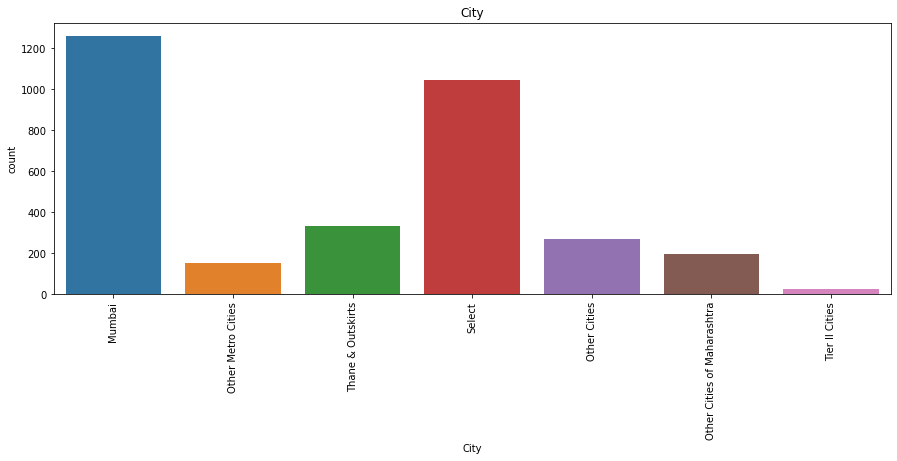

In [64]:
# Specialization
plt.figure(figsize=[15,5])
plt.title('City')
sns.countplot(x='City',data=df_Converted_1)
plt.xticks(rotation=90)
plt.show()

In [65]:
# Observations:
# 1. Most of the site vists are from 'Mumbai' and followed by 'Select'

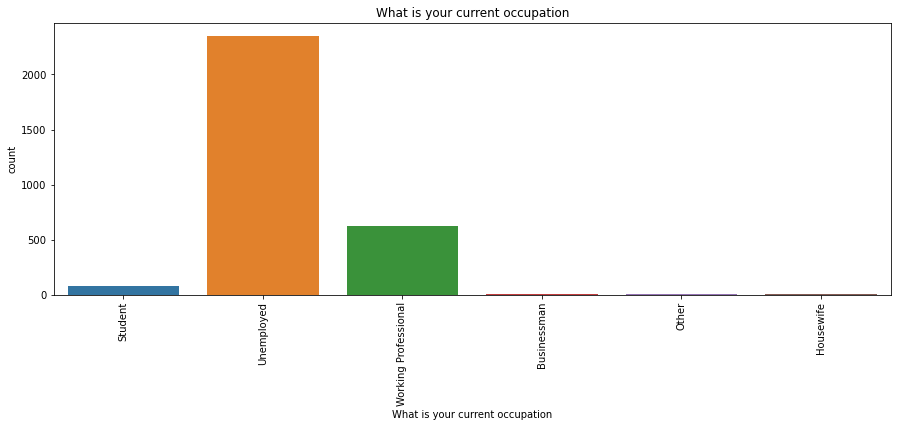

In [66]:
# Specialization
plt.figure(figsize=[15,5])
plt.title('What is your current occupation')
sns.countplot(x='What is your current occupation',data=df_Converted_1)
plt.xticks(rotation=90)
plt.show()

###  Bivariate analysis for Converted-0

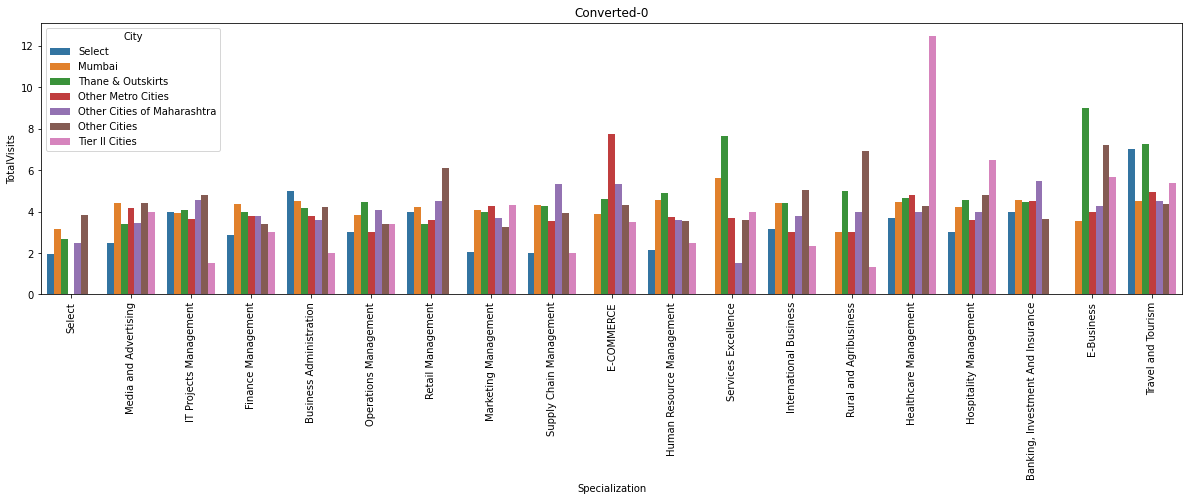

In [73]:
plt.figure(figsize=(45,5))

plt.subplot(1,2,1)
plt.title('Converted-0')
sns.barplot(x='Specialization',y='TotalVisits',data=df_Converted_0,hue="City",ci=None)
plt.xticks(rotation=90)
plt.show()

In [74]:
# Observations:
# 1. Healthcare Management specliazation from tier-2 cities have more visits followed by e-business specliazation from 
#    Thane & Outskirts 

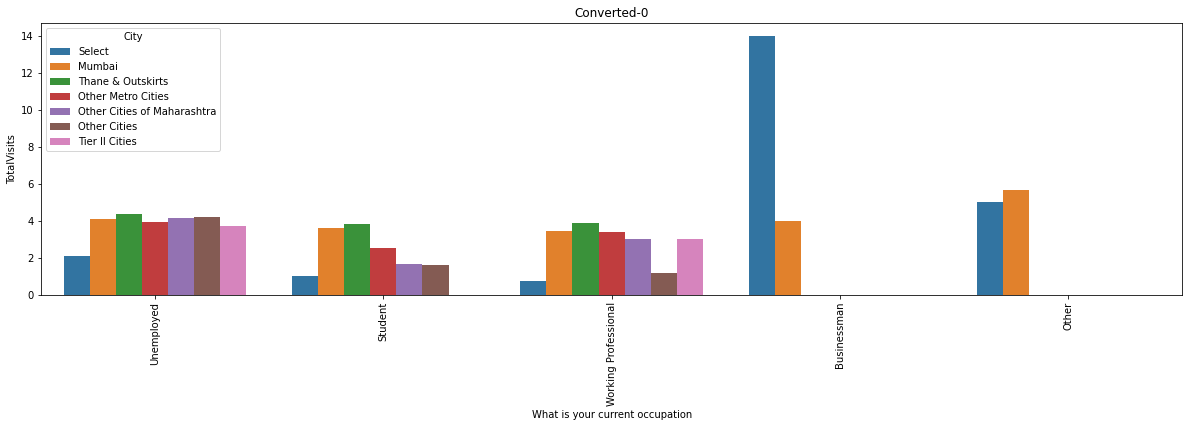

In [75]:
plt.figure(figsize=(45,5))

plt.subplot(1,2,1)
plt.title('Converted-0')
sns.barplot(x='What is your current occupation',y='TotalVisits',data=df_Converted_0,hue="City",ci=None)
plt.xticks(rotation=90)
plt.show()

In [76]:
# Observations:
# 1.Businessman have more vists from 'select' city followed by 'others' from mumbai city. 

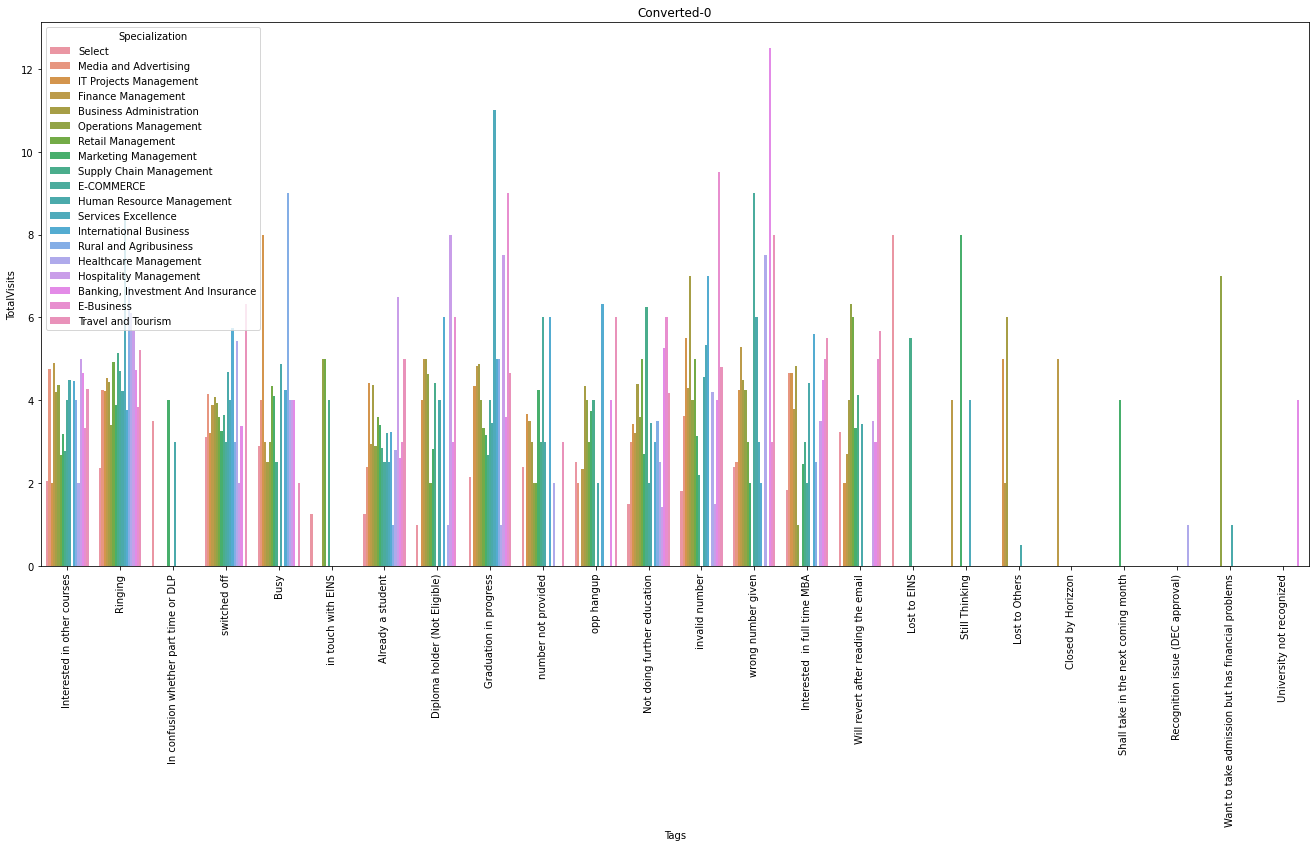

In [111]:
plt.figure(figsize=(50,10))
plt.subplot(1,2,1)
plt.title('Converted-0')
sns.barplot(x='Tags',y='TotalVisits',data=df_Converted_0,hue="Specialization",ci=None)
plt.xticks(rotation=90)
plt.show()

###  Bivariate analysis for Converted-1

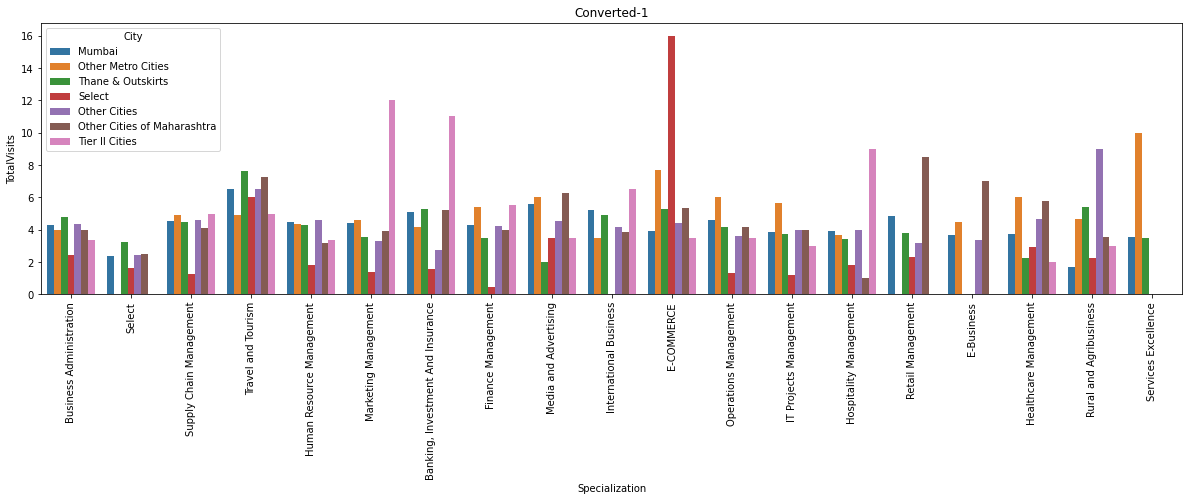

In [77]:
plt.figure(figsize=(45,5))

plt.subplot(1,2,1)
plt.title('Converted-1')
sns.barplot(x='Specialization',y='TotalVisits',data=df_Converted_1,hue="City",ci=None)
plt.xticks(rotation=90)
plt.show()

In [78]:
# Observations:
# 1. e-commerce specliazation from select cities have more visits followed by marketing management specliazation from 
#    tier-2 cities. 

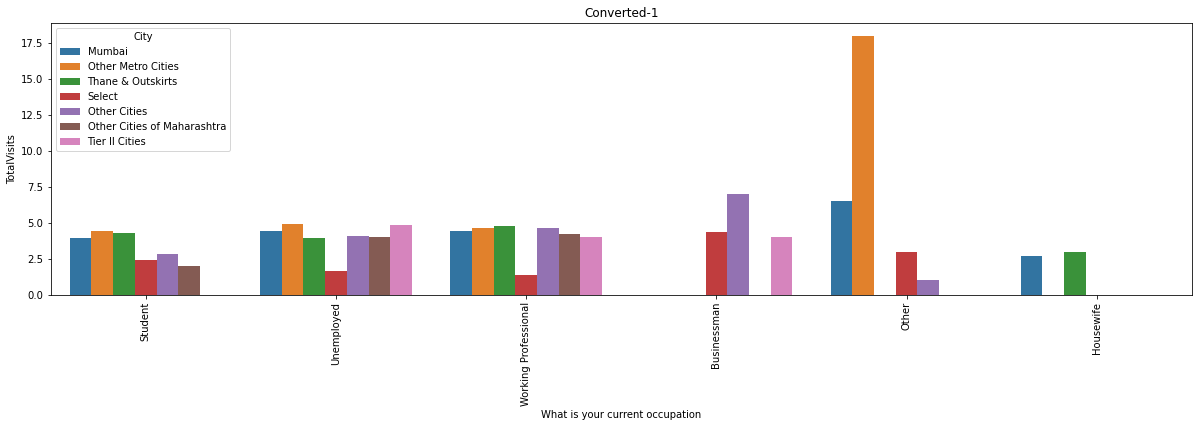

In [81]:
plt.figure(figsize=(45,5))

plt.subplot(1,2,1)
plt.title('Converted-1')
sns.barplot(x='What is your current occupation',y='TotalVisits',data=df_Converted_1,hue="City",ci=None)
plt.xticks(rotation=90)
plt.show()

In [82]:
# Observations:
# 1. Housewife are converted into leads.
# 2. Other occupations from other metro cities are converting into leads.

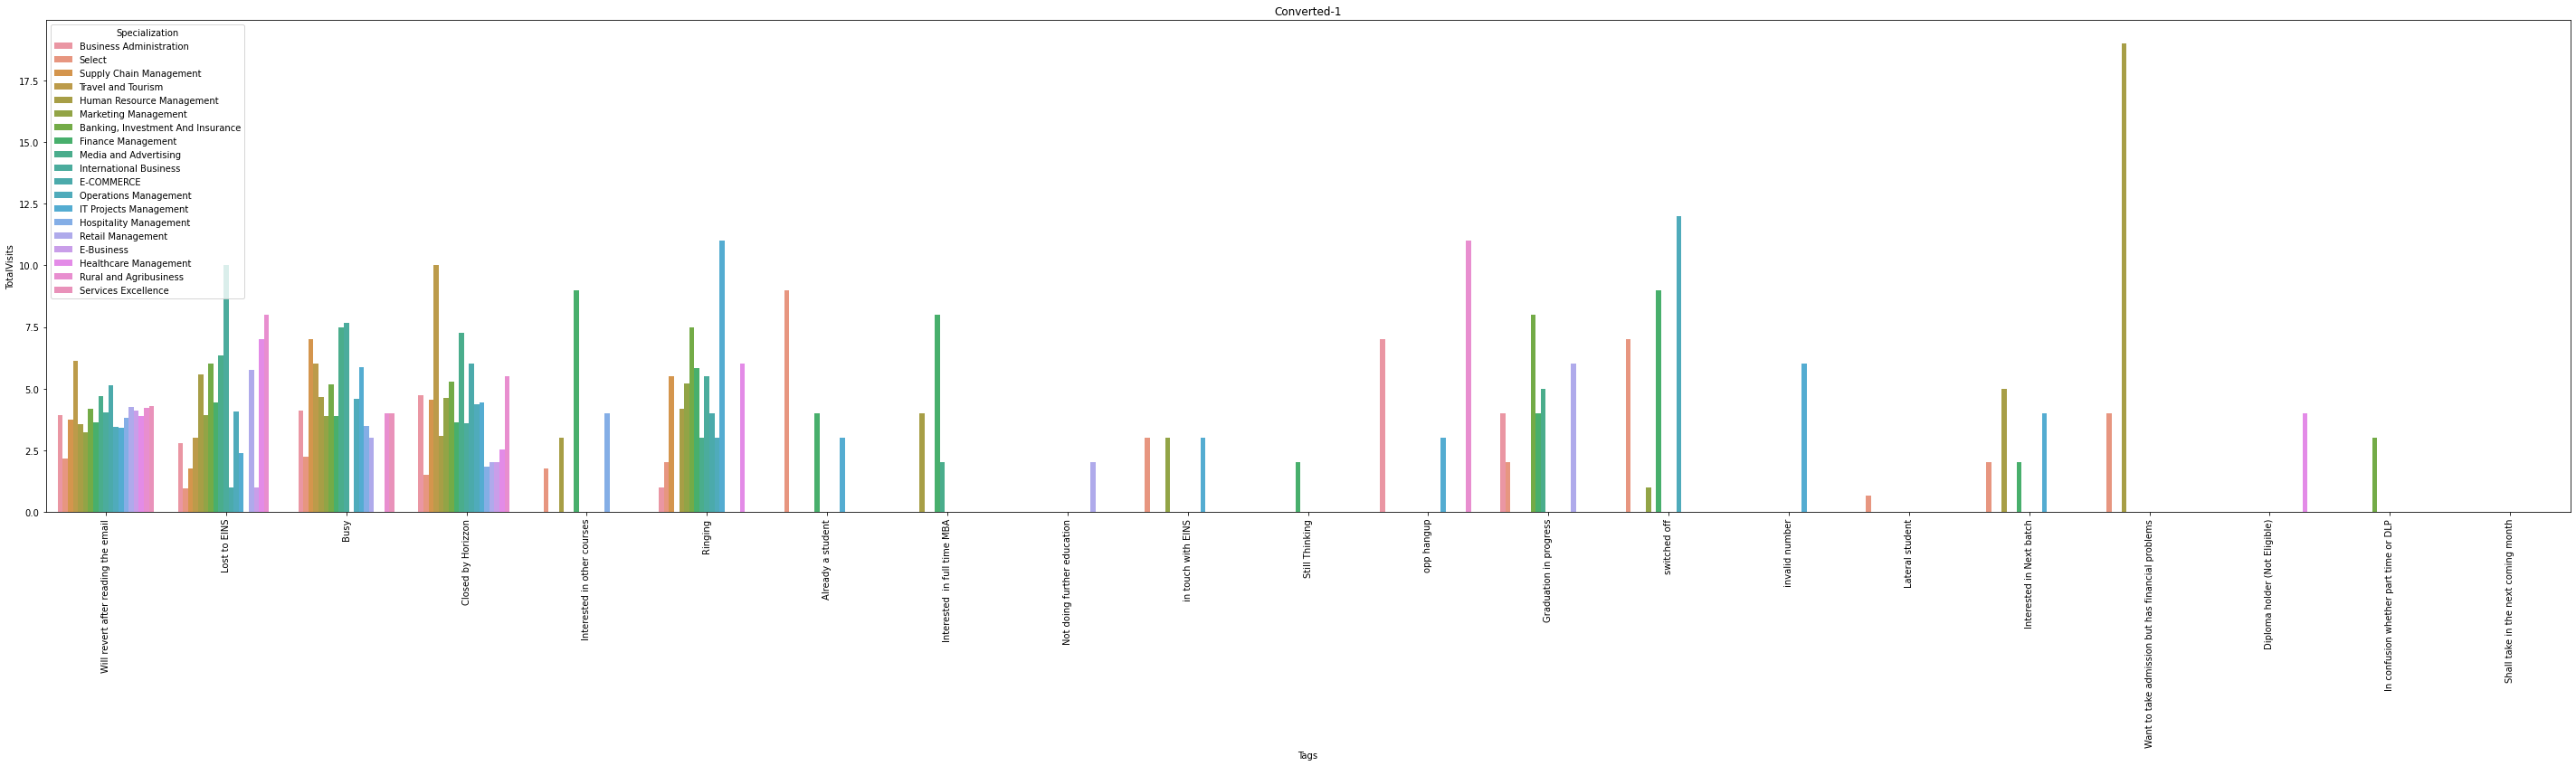

In [112]:
plt.figure(figsize=(50,10))
plt.title('Converted-1')
sns.barplot(x='Tags',y='TotalVisits',data=df_Converted_1,hue="Specialization",ci=None)
plt.xticks(rotation=90)
plt.show()